In [51]:
!pip install statsmodels

340
86
426


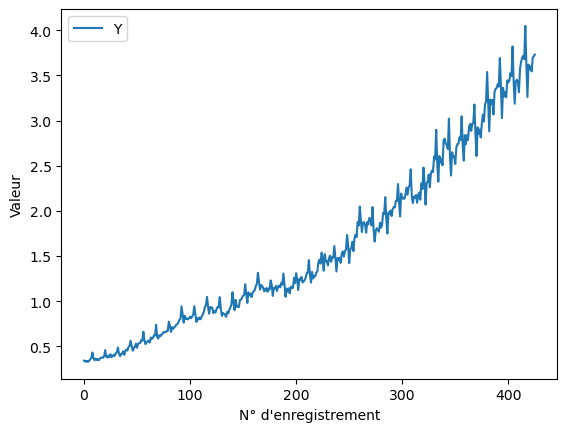

In [52]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from math import sqrt


raw_data = pd.read_csv("data/auscafe.csv")

data = raw_data.drop(raw_data.columns[[0]], axis=1)

serie = np.asarray(data['Y'])

ax = data.plot()
ax.set_xlabel("N° d'enregistrement")
ax.set_ylabel("Valeur")


N = len(serie)
train_length = int(N * 0.8)
test_length = N - train_length

train = serie[:train_length]
test = serie[-test_length:]

#train, test = train_test_split(serie, test_size=0.2)

print(len(train))
print(len(test))
print(N)

In [53]:
def plots_and_metrics(trn, tst, fitted_values, pred, title):
    print("RMSE:", mean_squared_error(tst, pred, squared=False))
    print("MAPE:", mean_absolute_percentage_error(tst, pred))

    full_data = np.concatenate((trn,tst))
    train_and_prediction = np.concatenate((trn, pred))

    plt.figure(figsize=(10,6))
    plt.plot(train_and_prediction, label='Predictions')
    plt.plot(fitted_values)
    plt.plot(full_data, label='Test')
    plt.title(title)

    plt.legend(loc='best')
    plt.show()

RMSE: 0.6369627452195212
MAPE: 0.1573780128360596


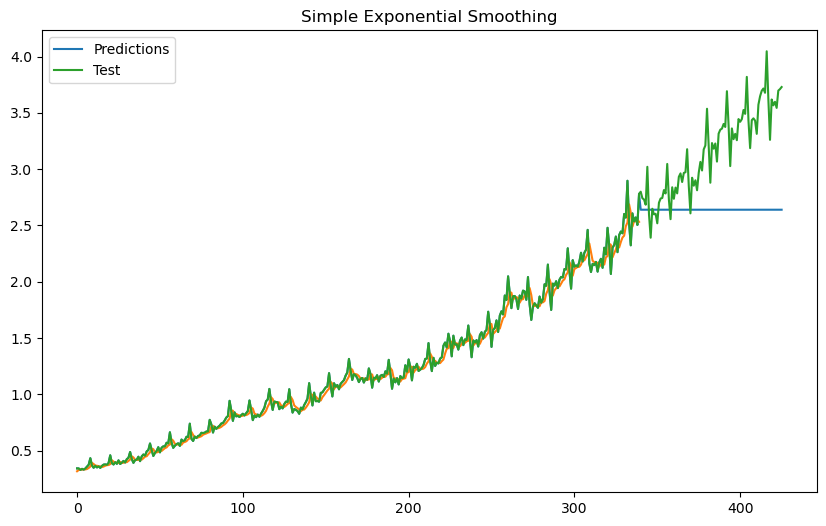

In [54]:
ses_model = SimpleExpSmoothing(train, initialization_method="heuristic").fit()

prediction = ses_model.forecast(test_length)
plots_and_metrics(train, test, ses_model.fittedvalues, prediction, "Simple Exponential Smoothing")

RMSE: 0.32801563593851335
MAPE: 0.07835393203077849


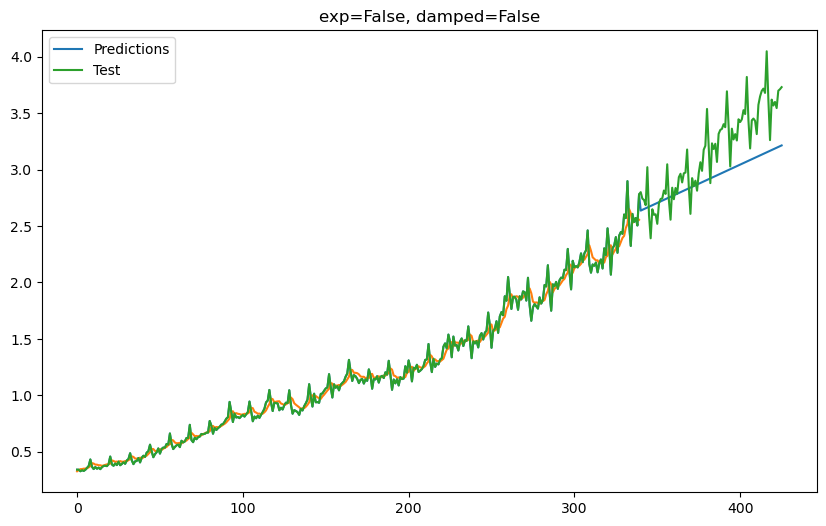

RMSE: 0.2865241193154332
MAPE: 0.06783265691797068


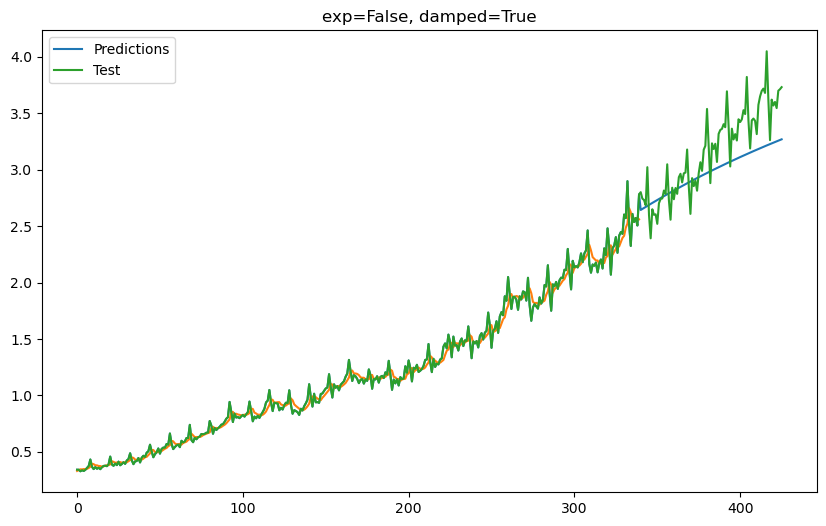

RMSE: 0.277722651378503
MAPE: 0.07341060723797674


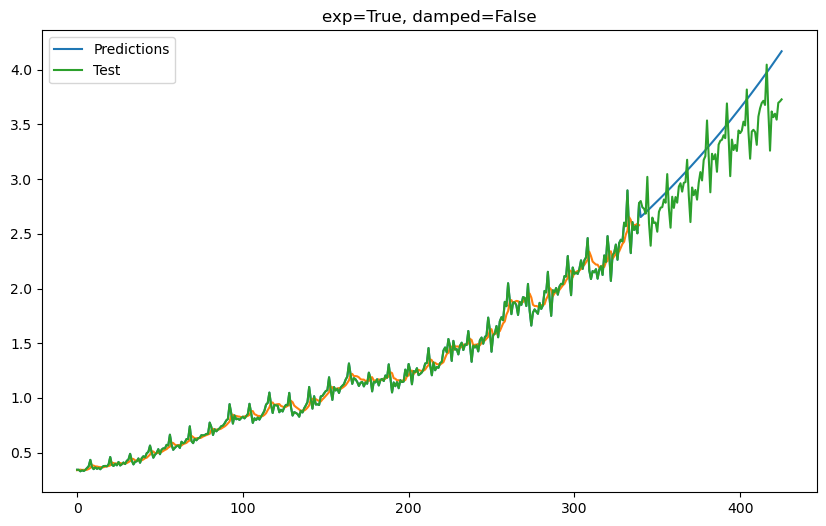

RMSE: 0.24410205582647906
MAPE: 0.05831172534367675


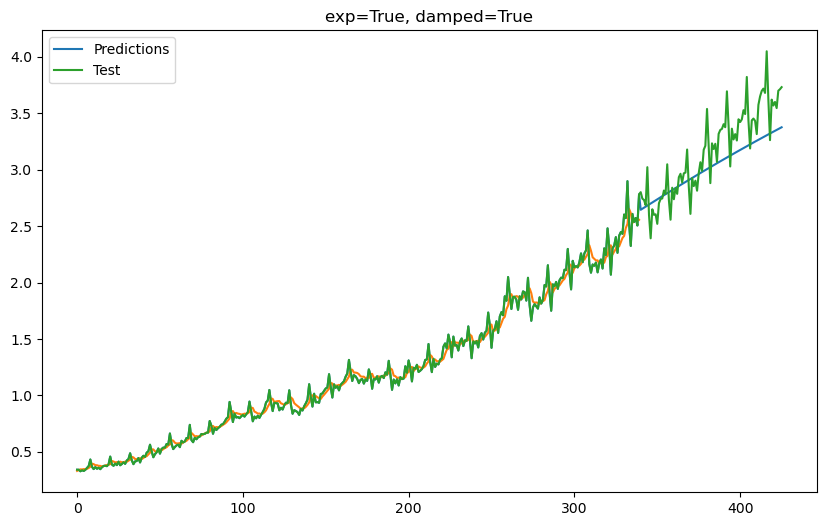

In [55]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing,Holt

init_method = "estimated"

models = list()

models.append(("exp=False, damped=False", Holt(endog=train, exponential=False, damped_trend=False, initialization_method=init_method).fit()))
models.append(("exp=False, damped=True", Holt(endog=train, exponential=False, damped_trend=True, initialization_method=init_method).fit()))
models.append(("exp=True, damped=False", Holt(endog=train, exponential=True, damped_trend=False, initialization_method=init_method).fit()))
models.append(("exp=True, damped=True", Holt(endog=train, exponential=True, damped_trend=True, initialization_method=init_method).fit()))

for name, model in models:
    prediction = model.forecast(test_length)
    plots_and_metrics(train, test, model.fittedvalues, prediction, name)


## Question 5

Le modèle avec `exp=True` et `damped_trend=False` donne les meilleurs résultats (3ème graphique). C'est le modèle qui a les plus petites valeurs pour RMSE et MAPE. Cela se confirme visuellement, il prédit mieux la tendance que les autres modèles.

## Question 6

c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1366: RuntimeWarning: invalid value encountered in power
  + (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1370: RuntimeWarning: invalid value encountered in power
  betac * dampen(b[i - 1], phi)
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1374: RuntimeWarning: invalid value encountered in power
  - (gamma * trended(lvls[i - 1], dampen(b[i - 1], phi)))
c:\Users\lcsch\anaconda3\envs\isd\lib\site-pack

RMSE: 0.12198747510969139
MAPE: 0.03402858339234383


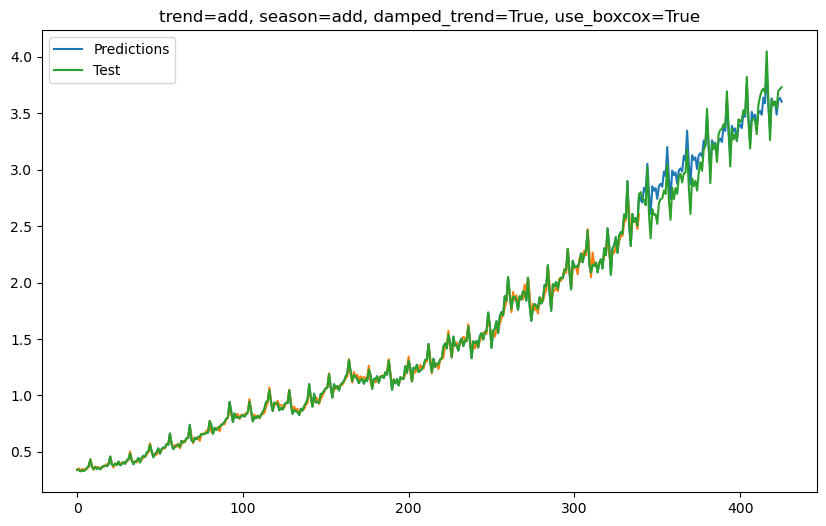

RMSE: 0.12436314878811916
MAPE: 0.034895872156371355


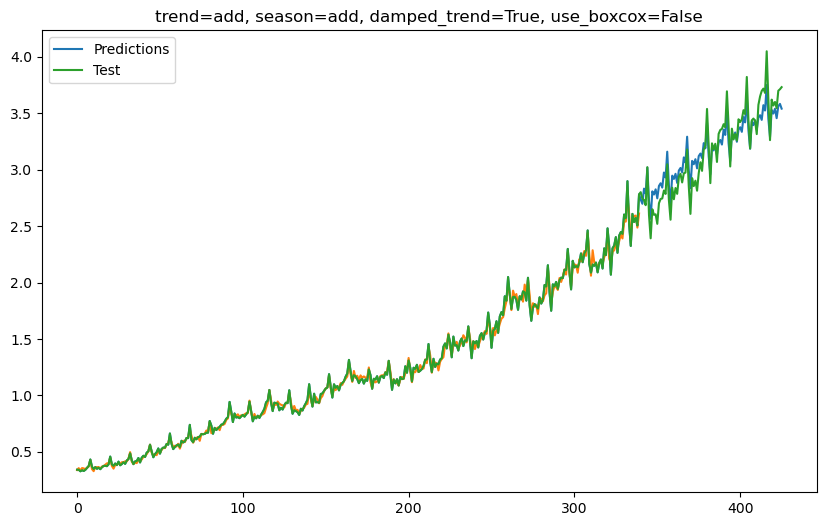

RMSE: 0.16028779482146946
MAPE: 0.04710493237503973


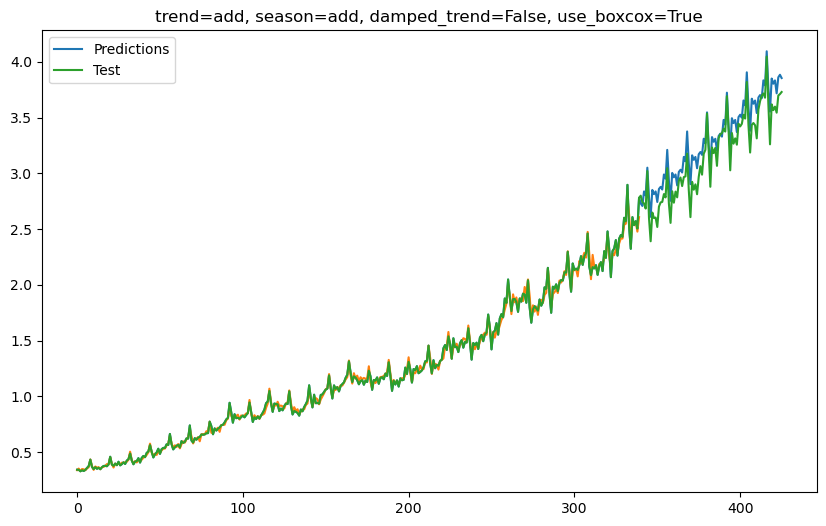

RMSE: 0.10788203870729478
MAPE: 0.030322339160038427


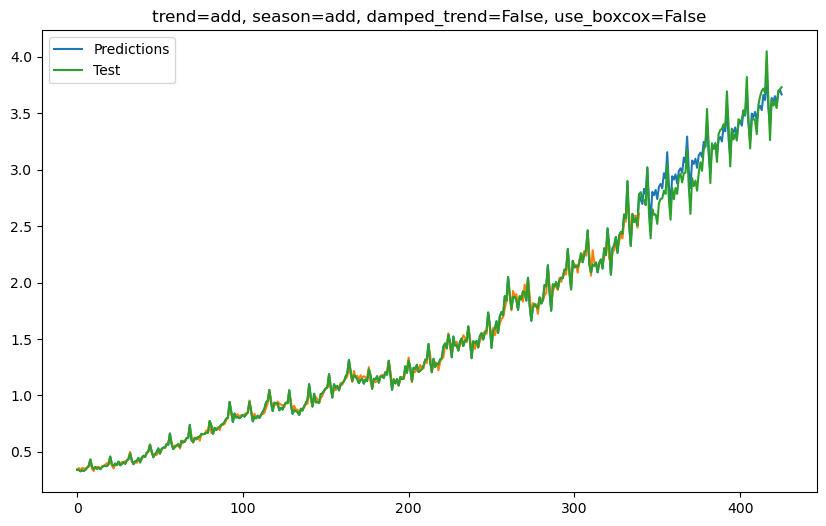

RMSE: 0.7222218873002473
MAPE: 0.1896392379735558


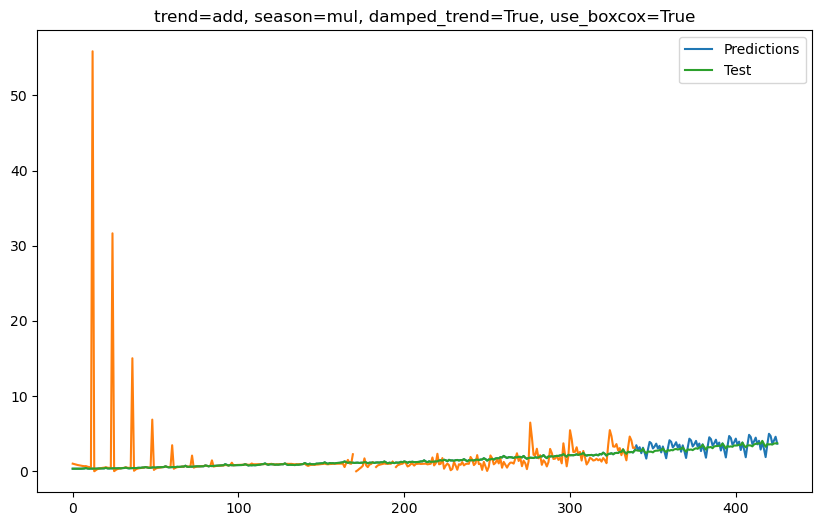

RMSE: 0.18960298600514575
MAPE: 0.05762554973266098


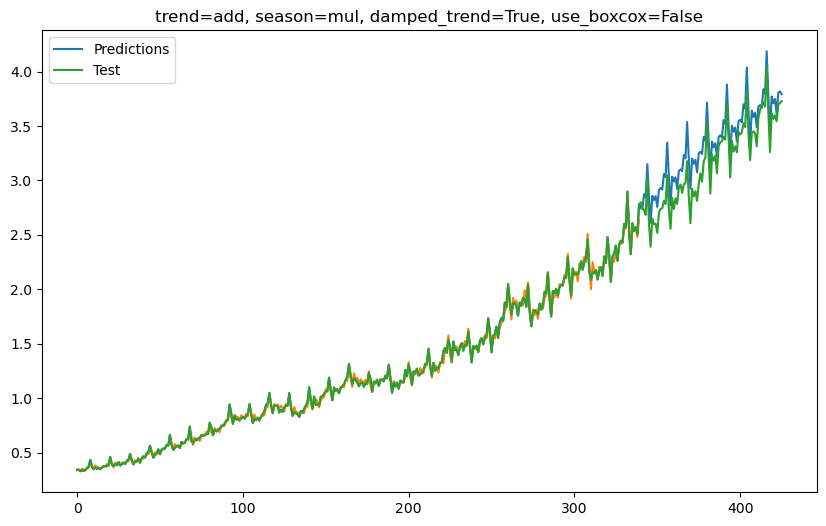

RMSE: 2.251154893768224
MAPE: 0.6987328728178595


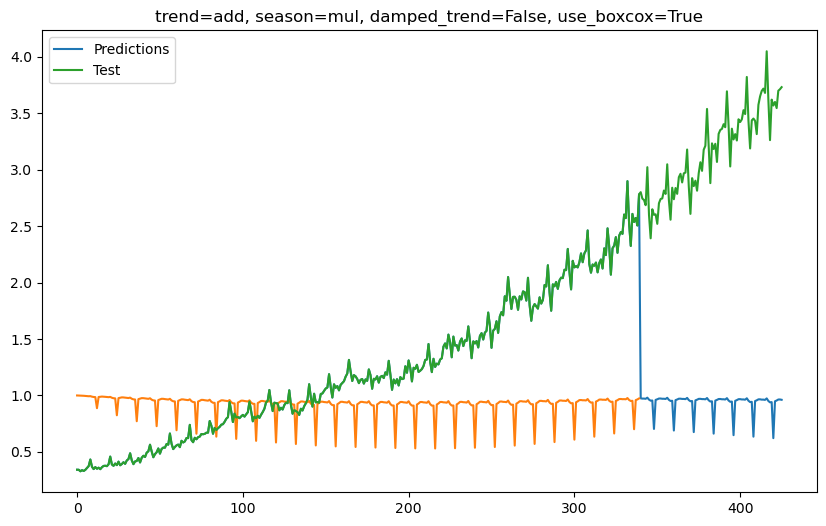

RMSE: 0.1756276999255559
MAPE: 0.05329247429745501


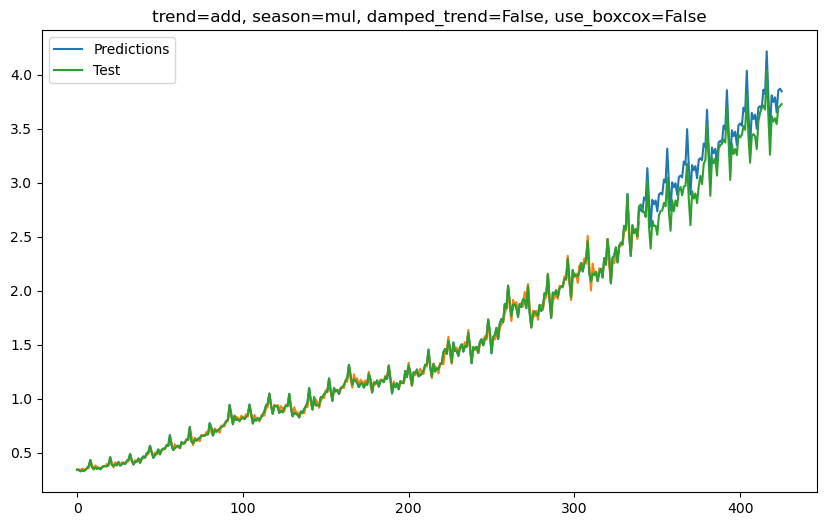

c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1366: RuntimeWarning: invalid value encountered in power
  + (alphac * trended(lvls[i - 1], dampen(b[i - 1], phi)))
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1370: RuntimeWarning: invalid value encountered in power
  betac * dampen(b[i - 1], phi)
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1374: RuntimeWarning: invalid value encountered in power
  - (gamma * trended(lvls[i - 1], dampen(b[i - 1], phi)))
c:\Users\lcsch\anaconda3\envs\isd\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1381: RuntimeWarning: invalid value encountered in power
  b[:nobs] = dampen(b[:nobs], phi)


ValueError: Input contains NaN.

In [61]:
import itertools
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt, Holt


init_method = "estimated"

params_combinations = list(itertools.product(
    ['add', 'mul'],  # trend
    ['add', 'mul'],  # seasonal
    [True, False],   # damped_trend
    [True, False]    # use_boxcox
))

models = list()
for trend, seasonal, damped_trend, use_boxcox in params_combinations:
    models.append((f"trend={trend}, season={seasonal}, damped_trend={damped_trend}, use_boxcox={use_boxcox}",
                    ExponentialSmoothing(initialization_method="estimated", endog=train, trend=trend, seasonal=seasonal, seasonal_periods=12, damped_trend=damped_trend, use_boxcox=use_boxcox).fit()))

for name, model in models:
    prediction = model.forecast(test_length)
    plots_and_metrics(train, test, model.fittedvalues, prediction, name)